In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('crime_data.csv')

In [3]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
data.shape

(50, 5)

In [6]:
data.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [7]:
data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [8]:
data.describe(include="all")

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
count,50,50.00000,50.000000,50.000000,50.000000
unique,50,NaN,NaN,NaN,NaN
top,Alabama,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,7.78800,170.760000,65.540000,21.232000
std,NaN,4.35551,83.337661,14.474763,9.366385
min,NaN,0.80000,45.000000,32.000000,7.300000
25%,NaN,4.07500,109.000000,54.500000,15.075000
50%,NaN,7.25000,159.000000,66.000000,20.100000
75%,NaN,11.25000,249.000000,77.750000,26.175000


In [9]:
data.rename({'Unnamed: 0':'location'},axis=1,inplace=True)

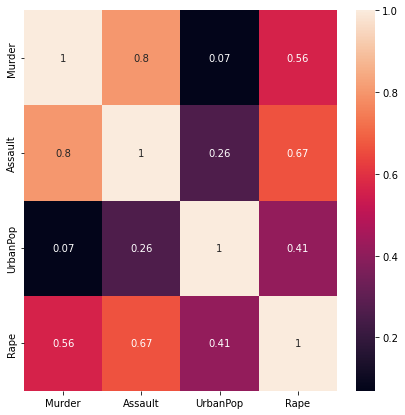

In [10]:
plt.figure(figsize =(7,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

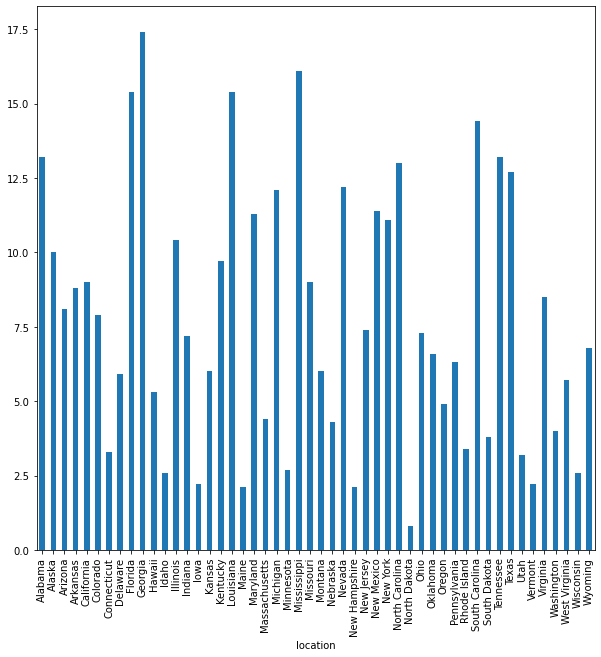

In [11]:
plt.figure(figsize=(10,10))
data.groupby(['location'])['Murder'].mean().plot(kind='bar')
plt.show()

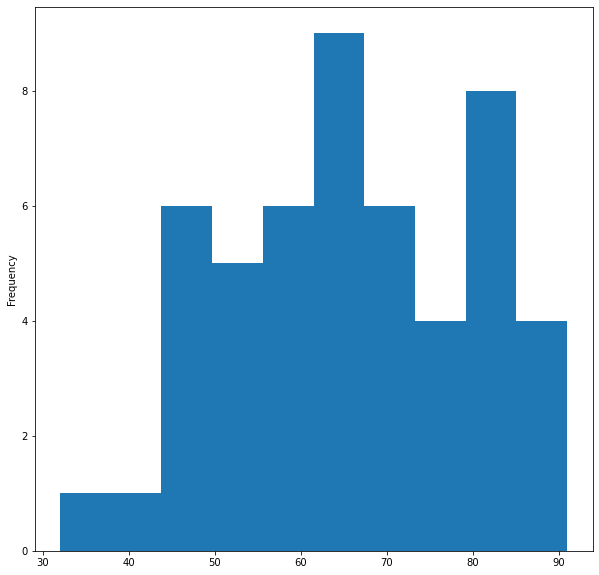

In [12]:
plt.figure(figsize=(10,10))
data.groupby(['location'])['UrbanPop'].mean().plot(kind='hist')
plt.show()

In [13]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [14]:
Scaled_data_df = norm_func(data.iloc[:,1:])

In [15]:
Scaled_data_df

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [16]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=12)
    kmeans.fit(Scaled_data_df)
    wcss.append(kmeans.inertia_)

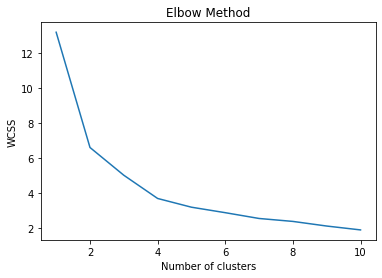

In [17]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
clusters_new = KMeans(4,random_state=12)
clusters_new.fit(Scaled_data_df)

KMeans(n_clusters=4, random_state=12)

In [19]:
clusters_new.labels_

array([2, 3, 3, 2, 3, 3, 0, 0, 3, 2, 0, 1, 3, 0, 1, 0, 1, 2, 1, 3, 0, 3,
       1, 2, 0, 1, 1, 3, 1, 0, 3, 3, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 3, 0,
       1, 0, 0, 1, 1, 0])

In [20]:
data1 = data['clusterid_new'] = clusters_new.labels_

In [21]:
clusters_new.cluster_centers_

array([[0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189]])

In [22]:
data.groupby('clusterid_new').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusterid_new,,,,
0,5.852941,141.176471,73.647059,19.335294
1,3.600000,78.538462,52.076923,12.176923
2,13.937500,243.625000,53.750000,21.412500
3,10.966667,264.000000,76.500000,33.608333


In [23]:
data[data['clusterid_new']==0]

,location,Murder,Assault,UrbanPop,Rape,clusterid_new
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
24,Missouri,9.0,178,70,28.2,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0


In [24]:
data[data['clusterid_new']==1]

,location,Murder,Assault,UrbanPop,Rape,clusterid_new
11,Idaho,2.6,120,54,14.2,1
14,Iowa,2.2,56,57,11.3,1
16,Kentucky,9.7,109,52,16.3,1
18,Maine,2.1,83,51,7.8,1
22,Minnesota,2.7,72,66,14.9,1
25,Montana,6.0,109,53,16.4,1
26,Nebraska,4.3,102,62,16.5,1
28,New Hampshire,2.1,57,56,9.5,1
33,North Dakota,0.8,45,44,7.3,1
40,South Dakota,3.8,86,45,12.8,1


In [25]:
data[data['clusterid_new']==2]

,location,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,2
3,Arkansas,8.8,190,50,19.5,2
9,Georgia,17.4,211,60,25.8,2
17,Louisiana,15.4,249,66,22.2,2
23,Mississippi,16.1,259,44,17.1,2
32,North Carolina,13.0,337,45,16.1,2
39,South Carolina,14.4,279,48,22.5,2
41,Tennessee,13.2,188,59,26.9,2


In [26]:
data[data['clusterid_new']==3]

,location,Murder,Assault,UrbanPop,Rape,clusterid_new
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
8,Florida,15.4,335,80,31.9,3
12,Illinois,10.4,249,83,24.0,3
19,Maryland,11.3,300,67,27.8,3
21,Michigan,12.1,255,74,35.1,3
27,Nevada,12.2,252,81,46.0,3
30,New Mexico,11.4,285,70,32.1,3


In [27]:
data_1 = data.drop('clusterid_new',axis=1)

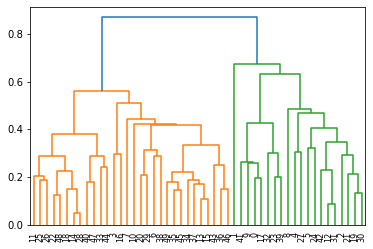

In [28]:
dendrogram = sch.dendrogram(sch.linkage(Scaled_data_df,method='average'),color_threshold=0.7)

In [29]:
hc = AgglomerativeClustering(n_clusters=4,affinity ='euclidean',linkage = 'average')

In [30]:
y_hc = hc.fit_predict(Scaled_data_df)
Clusters=pd.DataFrame(y_hc,columns=['clusters'])

In [31]:
Clusters

,clusters
0,3
1,2
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,3


In [32]:
data_1['h_clusterid'] = Clusters

In [33]:
data_1.sort_values('h_clusterid')

,location,Murder,Assault,UrbanPop,Rape,h_clusterid
49,Wyoming,6.8,161,60,15.6,0
28,New Hampshire,2.1,57,56,9.5,0
34,Ohio,7.3,120,75,21.4,0
26,Nebraska,4.3,102,62,16.5,0
25,Montana,6.0,109,53,16.4,0
48,Wisconsin,2.6,53,66,10.8,0
35,Oklahoma,6.6,151,68,20.0,0
22,Minnesota,2.7,72,66,14.9,0
36,Oregon,4.9,159,67,29.3,0
20,Massachusetts,4.4,149,85,16.3,0


In [34]:
data_2 = data_1.drop('h_clusterid',axis=1)

In [42]:
dbscan = DBSCAN(eps=.3,min_samples=12)
dbscan.fit(Scaled_data_df)

DBSCAN(eps=0.3, min_samples=12)

In [43]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1, -1, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1, -1,
       -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0],
      dtype=int64)

In [45]:
data_2['DB_Clusterid'] =dbscan.labels_

In [50]:
data_2.sort_values('DB_Clusterid')

,location,Murder,Assault,UrbanPop,Rape,DB_Clusterid
0,Alabama,13.2,236,58,21.2,-1
27,Nevada,12.2,252,81,46.0,-1
29,New Jersey,7.4,159,89,18.8,-1
30,New Mexico,11.4,285,70,32.1,-1
31,New York,11.1,254,86,26.1,-1
32,North Carolina,13.0,337,45,16.1,-1
33,North Dakota,0.8,45,44,7.3,-1
34,Ohio,7.3,120,75,21.4,-1
36,Oregon,4.9,159,67,29.3,-1
23,Mississippi,16.1,259,44,17.1,-1
